In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install wavio

In [26]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import cv2
from google.colab.patches import cv2_imshow
import wavio
import numpy as np
import librosa
import PIL.Image
from IPython.display import display, clear_output

# Define the output file path
output_audio_path = "output_audio.wav"
active_speaker = 'None'

# Load the video clip
video_path = "/content/drive/MyDrive/FYP/final_vid.mp4"
video_clip = VideoFileClip(video_path)
segLen=3

output_video_path = "output_video.mp4"

# Initialize OpenCV video capture for video frames
cap = cv2.VideoCapture(video_path)
frame_count=0
frame_rate=video_clip.fps

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the output video (other options are 'XVID', 'MJPG', etc.)
f_height, f_width, channels = video_clip.get_frame(0).shape
target_size=(f_width, f_height)
out = cv2.VideoWriter(output_video_path, fourcc, video_clip.fps, target_size)
frame_skip = 2

# Iterate through each frame of the video
for frame_num in range(int(video_clip.fps * video_clip.duration)):
    if frame_num % frame_skip != 0:
        continue
    frame_time = frame_num / video_clip.fps
    video_frame = video_clip.get_frame(frame_time)

    if frame_count!=0:
      # Read audio segment for the current frame
      audio_segment = video_clip.audio.subclip(frame_time, frame_time + 1)  # Extract audio for 1 second around the frame
      a_data = audio_segment.to_soundarray()

      # Extracted audio data
      audio_data = a_data
      # Save the audio data as a WAV file
      wavio.write(output_audio_path, audio_data, rate=44100, sampwidth=2)  # Specify the sampling rate
      img_frame = PIL.Image.fromarray(video_frame)
      out.write(cv2.cvtColor(video_frame, cv2.COLOR_RGB2BGR))

    # Display the video frame using PIL.Image
      display(img_frame)
      clear_output(wait=True)  # Clear previous frame
    prev_frame=video_frame
    frame_count+=1
      # You can also play audio_data here using an audio library like 'pydub'

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
out.release()
cap.release()
cv2.destroyAllWindows()

error: ignored

In [23]:
from IPython.display import Video

# Display the video in the Colab notebook
video_path = "output_video.mp4"
Video(video_path, embed=True)

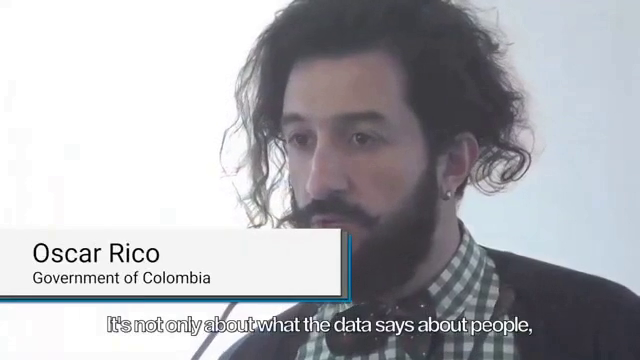

In [27]:
import os

# Define the output frames folder path
output_frames_folder = "output_frames"
os.makedirs(output_frames_folder, exist_ok=True)  # Create the folder if it doesn't exist

# ...

# Iterate through each frame of the video
for frame_num in range(int(video_clip.fps * video_clip.duration)):
    if frame_num % frame_skip != 0:
        continue
    frame_time = frame_num / video_clip.fps
    video_frame = video_clip.get_frame(frame_time)

    if frame_count != 0:
        # Read audio segment for the current frame
        audio_segment = video_clip.audio.subclip(frame_time, frame_time + 1)
        a_data = audio_segment.to_soundarray()
        # Save the audio data as a WAV file
        wavio.write(output_audio_path, audio_data, rate=44100, sampwidth=2)
    out.write(cv2.cvtColor(video_frame, cv2.COLOR_RGB2BGR))

    # Save the processed frame as an image file
    frame_filename = os.path.join(output_frames_folder, f"frame_{frame_num:04d}.jpg")
    cv2.imwrite(frame_filename, cv2.cvtColor(video_frame, cv2.COLOR_RGB2BGR))

    # Rest of the loop

    img_frame = PIL.Image.fromarray(video_frame)

    # Display the video frame using PIL.Image
    display(img_frame)
    clear_output(wait=True)  # Clear previous frame
    prev_frame=video_frame
    frame_count+=1
      # You can also play audio_data here using an audio library like 'pydub'

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
out.release()
cap.release()
cv2.destroyAllWindows()

In [30]:
from moviepy.editor import VideoFileClip, VideoClip

# Path to the folder containing the processed frames
output_frames_folder = "output_frames"

# List the image files in the folder
frame_files = sorted([f for f in os.listdir(output_frames_folder) if f.endswith(".jpg")])

# Get the frame dimensions from the first frame
first_frame = cv2.imread(os.path.join(output_frames_folder, frame_files[0]))
frame_height, frame_width, _ = first_frame.shape

# Define the output video path
output_video_path = "output_video_from_frames.mp4"

# Function to load each frame
def load_frame(t):
    frame_num = int(t * frame_rate)
    frame_path = os.path.join(output_frames_folder, frame_files[frame_num])
    return cv2.imread(frame_path)

# Create a VideoClip by loading each frame
output_video = VideoClip(make_frame=load_frame, duration=len(frame_files) / frame_rate)
output_video.fps = frame_rate  # Set the fps attribute

# Write the output video
output_video.write_videofile(output_video_path, codec="libx264")

# Close the video clip
output_video.close()


Moviepy - Building video output_video_from_frames.mp4.
Moviepy - Writing video output_video_from_frames.mp4



Moviepy - Done !
Moviepy - video ready output_video_from_frames.mp4
